**Importar-Librerias**

In [ ]:
pip install scikit-posthocs #SE INSTALA PARA DUNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import levene
from itertools import combinations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal
import scikit_posthocs as sp
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Cargar datos**

In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/curso-est/corte-2/datos/datos_satisfaccion.xlsx")
datos.head()

,Grupo,Factor,Valor
0,T1,0%,6
1,T1,0%,8
2,T1,0%,7
3,T1,0%,8
4,T2,"0,5%",7


**Comprobar supuestos**

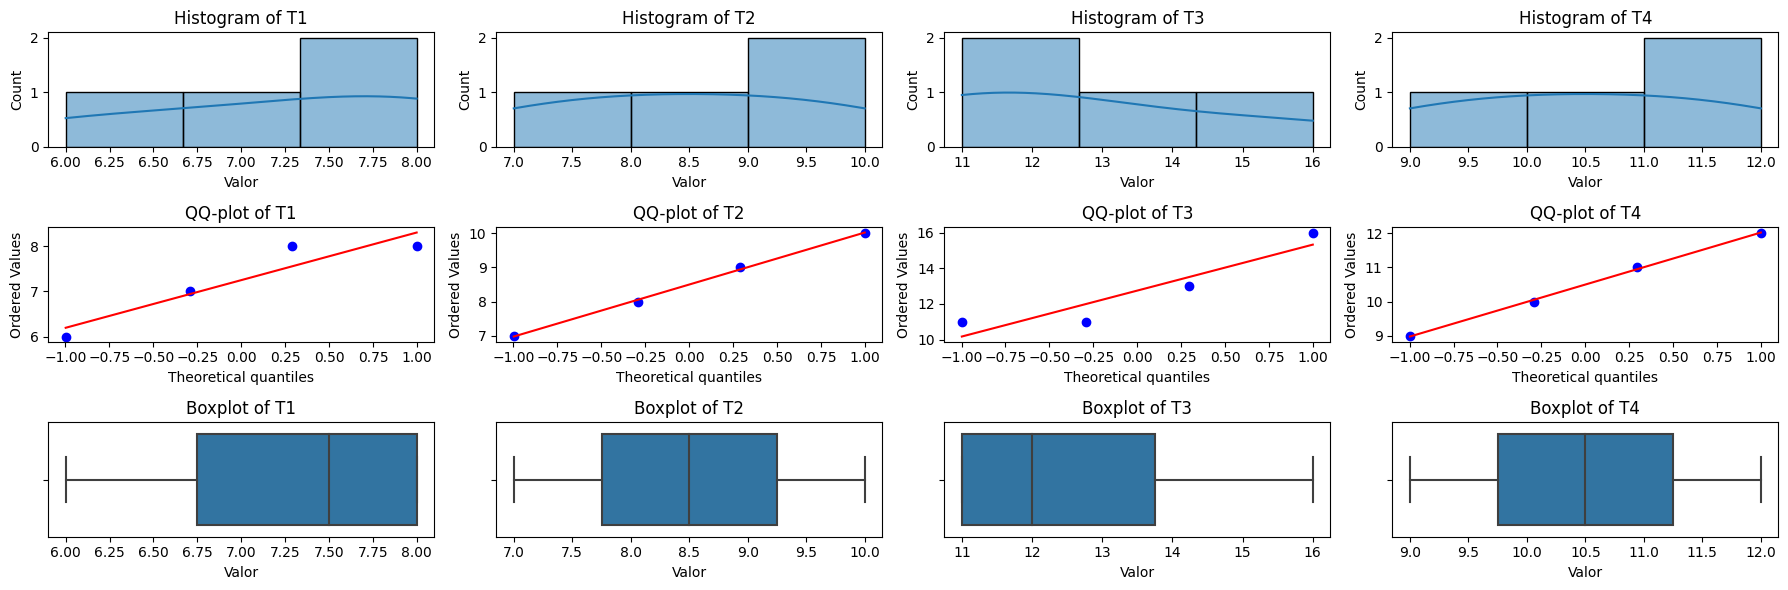

In [ ]:
unique_groups = datos['Grupo'].unique()

plt.figure(figsize=(18, 6))
for i, group in enumerate(unique_groups):
    plt.subplot(3, len(unique_groups), i+1)
    sns.histplot(datos[datos['Grupo'] == group]['Valor'], kde=True)
    plt.title(f'Histogram of {group}')

    plt.subplot(3, len(unique_groups), len(unique_groups) + i+1)
    stats.probplot(datos[datos['Grupo'] == group]['Valor'], plot=plt)
    plt.title(f'QQ-plot of {group}')

    plt.subplot(3, len(unique_groups), 2*len(unique_groups) + i+1)
    sns.boxplot(x=datos[datos['Grupo'] == group]['Valor'])
    plt.title(f'Boxplot of {group}')

plt.tight_layout()
plt.show()

**PRUEBA SHAPIRO**

In [ ]:
shapiro_results = {}
for group in unique_groups:
    _, p_value = stats.shapiro(datos[datos['Grupo'] == group]['Valor'])
    shapiro_results[group] = round(p_value, 4)

print("Valores p de la prueba de Shapiro para cada grupo:")
for group, p_value in shapiro_results.items():
    print(f"  - Grupo {group}: {p_value}")

Valores p de la prueba de Shapiro para cada grupo:
  - Grupo T1: 0.2725
  - Grupo T2: 0.9719
  - Grupo T3: 0.22
  - Grupo T4: 0.9719


**PRUEBA KOLMOGOROV**

In [ ]:
ks_results = {}
for group in unique_groups:
    values = datos[datos['Grupo'] == group]['Valor']
    _, p_value = kstest(values, 'norm', args=(values.mean(), values.std()))
    ks_results[group] = round(p_value, 4)

print("Valores p de la prueba de Kolmogorov-Smirnov para cada grupo:")
for group, p_value in ks_results.items():
    print(f"  - Grupo {group}: {p_value}")

Valores p de la prueba de Kolmogorov-Smirnov para cada grupo:
  - Grupo T1: 0.8207
  - Grupo T2: 0.9998
  - Grupo T3: 0.8558
  - Grupo T4: 0.9998


**PRUEBA - HOMOCEDASTICIDAD - LEVENE**

In [ ]:
unique_groups = datos['Grupo'].unique()
group_values = [datos[datos['Grupo'] == group]['Valor'].tolist() for group in unique_groups]
_, p_value = levene(*group_values)
p_value_rounded = round(p_value, 4)
p_value_rounded

print(f"Valor p de la prueba de Levene para todos los grupos: {p_value_rounded}")

Valor p de la prueba de Levene para todos los grupos: 0.4485


**Prueba Kruskall-Wallis**

In [ ]:
grouped_data = [group['Valor'].tolist() for name, group in datos.groupby('Grupo')]
kruskal_result = kruskal(*grouped_data)

print(f"Valor p de Kruskal-Wallis: {round(kruskal_result.pvalue, 4)}")

Valor p de Kruskal-Wallis: 0.009


**Prueba Dun**

In [ ]:
dunn_result = sp.posthoc_dunn(datos, val_col='Valor', group_col='Grupo', p_adjust='bonferroni')
adjusted_p_values_df = dunn_result.stack().reset_index()
adjusted_p_values_df.columns = ['Grupo1', 'Grupo2', 'Adjusted_P_Value']
adjusted_p_values_df = adjusted_p_values_df.query("Grupo1 < Grupo2").reset_index(drop=True)

print("Valores p ajustados de la prueba de Dunn:")
print(adjusted_p_values_df)

Valores p ajustados de la prueba de Dunn:
  Grupo1 Grupo2  Adjusted_P_Value
0     T1     T2          1.000000
1     T1     T3          0.011337
2     T1     T4          0.163199
3     T2     T3          0.134403
4     T2     T4          0.996171
5     T3     T4          1.000000


**Boxplot**

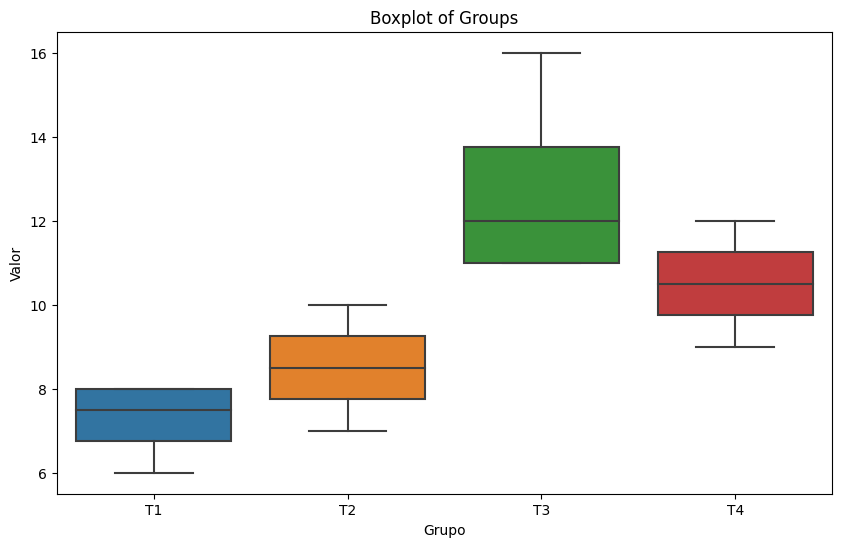

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Valor', data=datos)
plt.title('Boxplot of Groups')
plt.xlabel('Grupo')
plt.ylabel('Valor')
plt.show()